# Tips Analysis
Becca Banning - 10/5/24

Perform and publish a custom EDA project to demonstrate skills with Jupyter, pandas, Seaborn and popular tools for data analytics. The notebook should tell a data story and visually present findings in a clear and engaging manner.

## Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Acquisition

In [2]:
# Load the dataset into a pandas DataFrame - adjust this process for your custom data
df = sns.load_dataset('tips')

# Inspect first rows of the DataFrame
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Initial Data Inspection

In [3]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
(244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


## Initial Descriptive Statistics

In [4]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


## Initial Data Distribution for Numerical Columns

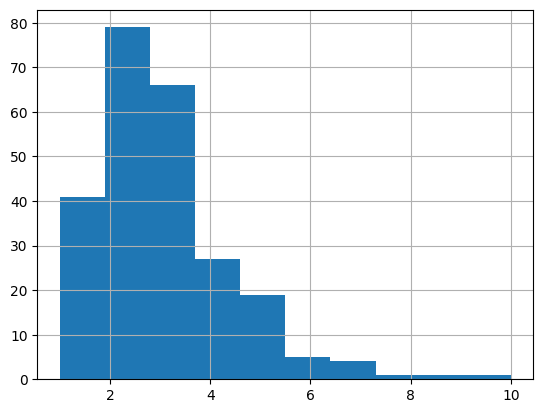

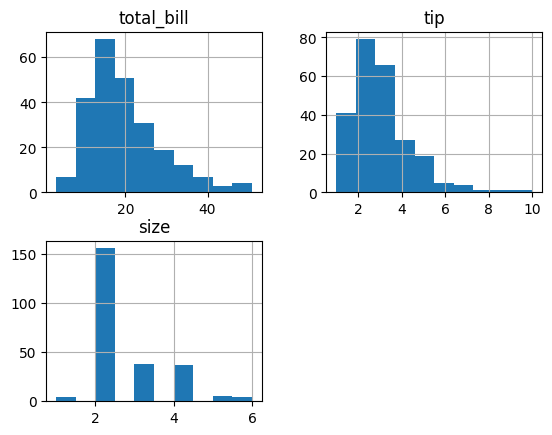

In [5]:
# Inspect histogram by numerical column
df['tip'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

## Initial Data Distribution for Numerical Columns Observations

The total bill peaks at just below 20. The tip peaks at 2. The table size peaks at 2.

## Initial Data Distribution for Categorical Columns

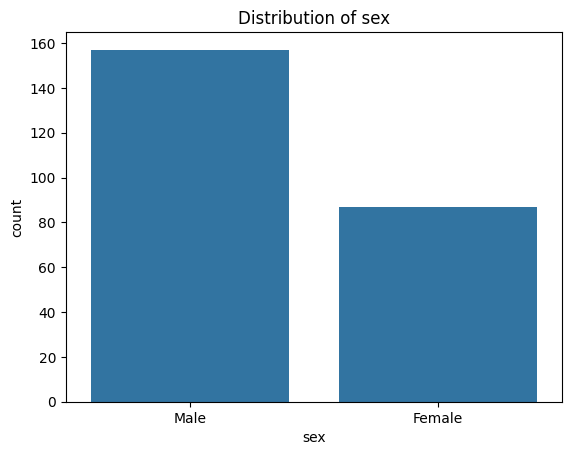

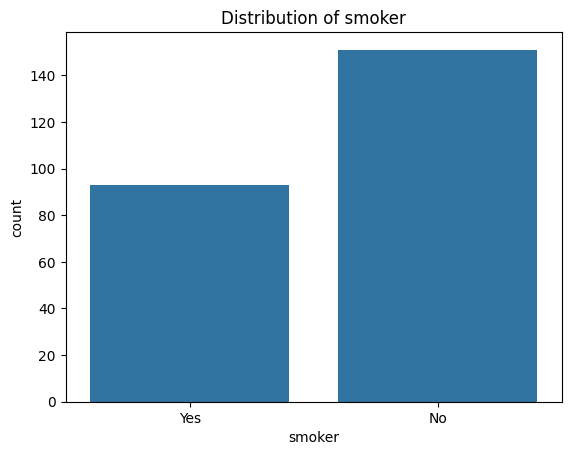

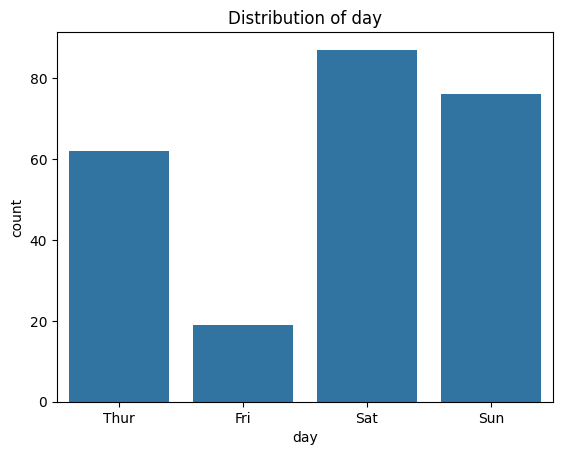

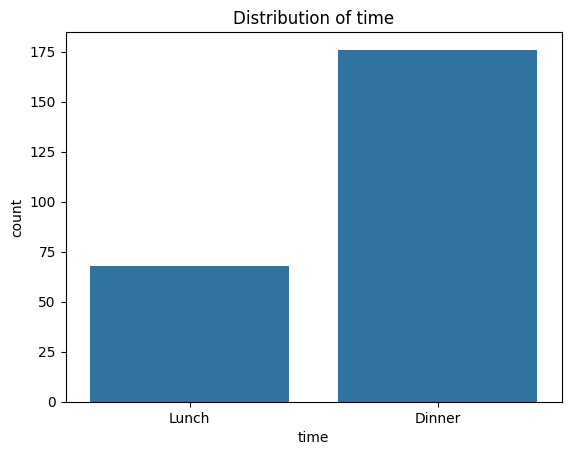

In [6]:
# Inspect value counts by categorical column
df['day'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

## Initial Data Distribution for Categorical Columns Observations

There are almost double the male servers than female servers. There are more non-smokers than smokers. Most of the bills are on Saturday and Sunday and there's a huge drop on Friday. There are more than double the tables at dinner than lunch.

## Initial Data Transformation and Feature Engineering

In [7]:
# Renaming a column
df.rename(columns={'size': 'table_size'}, inplace=True)

# Adding a new column
df['tip_percentage'] = df['tip'] / df['total_bill']

## Initial Visualizations

Goal: Discover the differences between male and female servers.
Chart Type: Pair plot
Story: The total bill, tip, tip percentage and table size is larger for male servers than female servers.

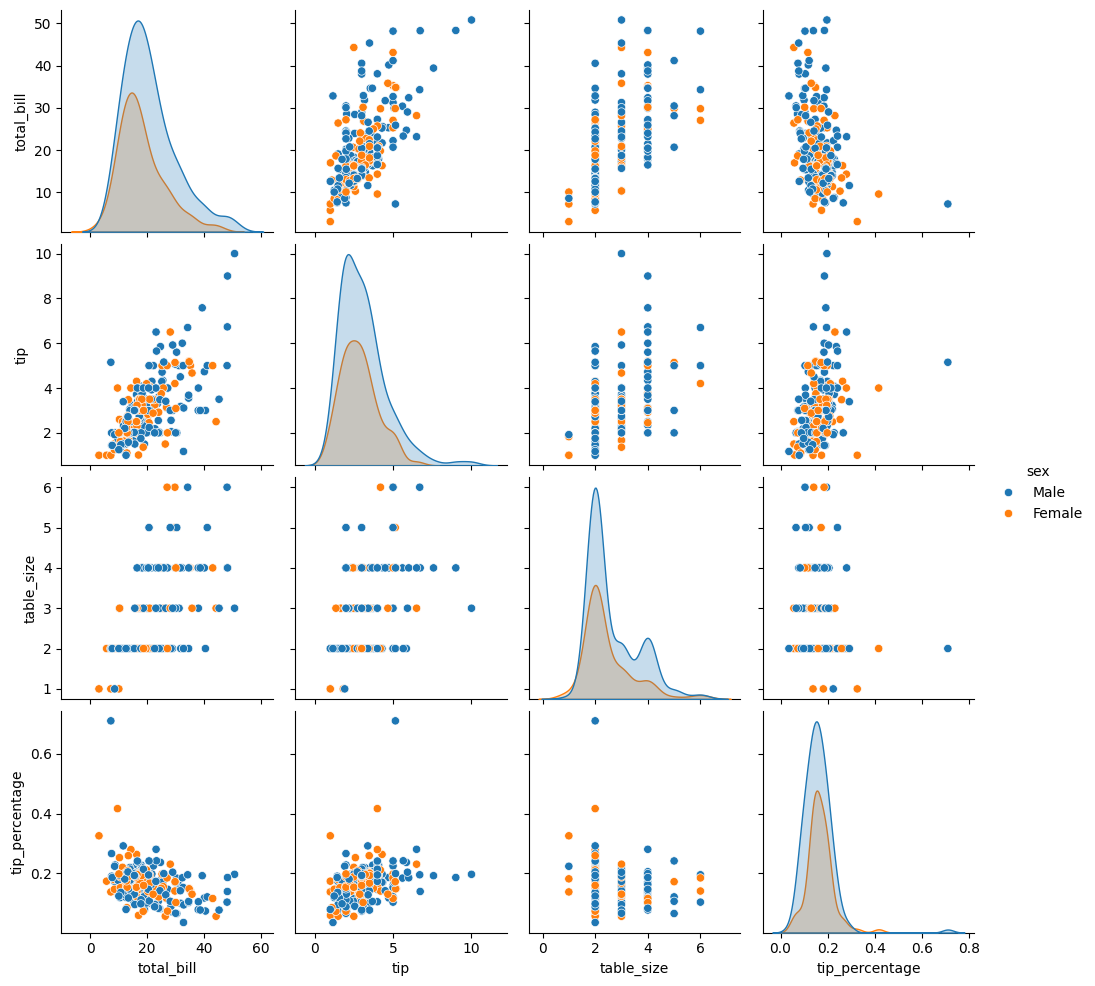

In [8]:
sns.pairplot(df, hue='sex')
plt.show()

Goal: Discover the differences if the tip percentage varies by day of the week.
Chart Type: Box plot
Story: The tip percentage does not vary by the day of the week.

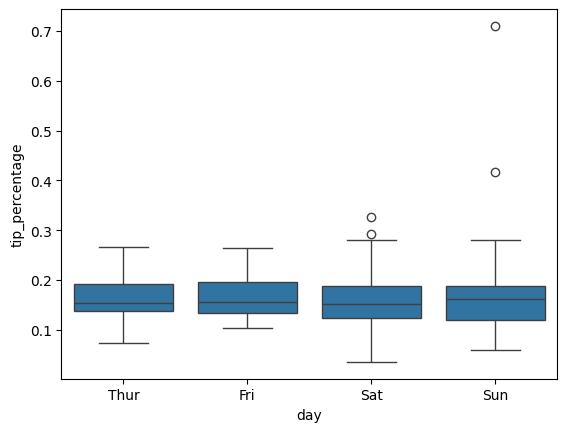

In [9]:
sns.boxplot(x='day', y='tip_percentage', data=df)
plt.show()

Goal: Discover if the tip percentage changes based on table size.
Chart Type: Line plot
Story: Tables with one person tip better than larger tables and decrease as the size of the table increases. It starts to tick up once the table reaches 6 people.

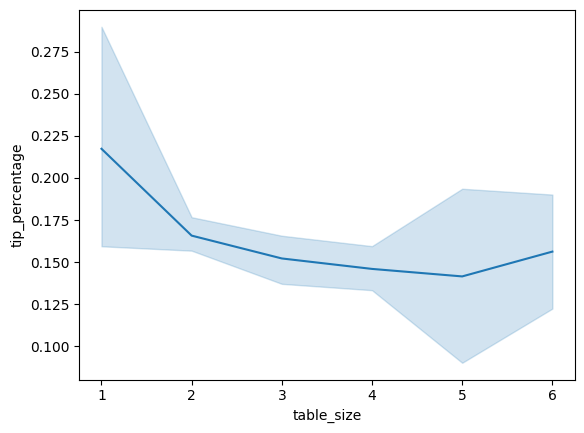

In [13]:
sns.lineplot(x='table_size', y='tip_percentage', data=df)
plt.show()